# Dimensinality Reduction via Principal Component Analysis

Many dimensionality reduction algorithms work by modeling the "manifold" on which the training instances lie; this is called *Manifold Learning*. It relies on the assumption that most real world high dimensional data set lie close to a much lower-dimensional manifold. Data reduction techniques is class of transformations methods which reduce the data by generating a smaller set of predictors that seek to capture a "majority" of information on the original variables. Hence, fewer variables can be used that provide a reasonable "fidelity" to the original data. 

Dimensionality redcution typically leads to lost of information and lack of interpretability in the resulting model or system. However, reducing the dimension of a given data set may lead to speeding up your system, and also filter out noise and unecessary details and hence result in better model or system performance. It also help one gain insight into high dimensional data set through vizualization.

High dimension data sets are at risk of being very sparse. That is most training instances are likely to be further away from each other. In addition, a new training instance will likely be further away from any training instance, making the process of prediction much less reliable than in a lower dimensional data set since they will be based on much larger extrapolations. Summarily, the lager the dimension of the data set, the greater the chances of overfitting.

The two main approcahes for dimensionality reduction are: projection and Manifold Learning. In most cases, training instances are not uniformly spread out across all dimensions. Most features are almost constant, while others are highly correlated. Therefore, the training instances actually lies within a lower dimensional subspace of the high dimensional space.

A $d$-dimensional manifold is part of an $n$-dimensional space ($d<n$) that locally resembles a $d$-dimensional hyperplane. There are several dimensionality reduction algorithms amongst which are the following:

* Princial Component Analysis (PCA) by far the most common dimensionality reduction technique. There different kinds of PCS
    + PCA for compresion
    + Incremental PCA
    + Randomized PCA
    + Kernel PCA
* Locally Linear Embedding (LLE).

LLE is a dimensionality reduction technique that does not rely on projection onto a smaller subspace. It works by first measuring how each training instance linearly relates to its closest neighbors, and then looking for a low dimensional representation of the training set where these local relationships are best preserved.


## Principal Component Analysis

PCA is by far the most porpular dimensionality reduction technique. It first identifies the plane closest to the data and then projects the data onto it.This is accomplished by seeking linear combinations of the predictors (see equation below), known as the principal components (PCs), which capture the most variance. For most dimensionality reduction techniques, the new predictors are a function of the original predictors; therefore, all the original predictors are stil needed to create the surrogate variables. This class of methods is often called signal extraction or feature extraction techiques. That is PCA identifies the axis that accounts for the largest amount of variance in the data set.

The first PC is defined as a linear combination of the predictors that capture the most variability of all posible linear combinations. Subsequent PCs are derived such that these linear combinatitions capture the most remaining variability while also being uncorrelated with all previous PCs. Mathematically, the $j^{th}$ PC can be written as:

$$PC_{j}= \sum_{k=1}^{p}a_{jk}\times \text{Predictor}_k$$

Here, $p$ denotes the number of predictors (or columns) in the data set. The coefficients $a_{j1}, a_{j2}, \cdots, a_{jp}$ are called component weights which help understand the predictor importance in each PC. The primary avantage of PC and the reason it has maintained its popularity is that it creates components that are uncorrelated (orthogonal). For most data sets, predictors are on different scales and may have skewed distributions. Therefore, to help PCA avoid summarizing distributional differences and predictor scale information, it is advisable to first transform skewed predictors and then center and scale predictors prior to performing PCA.

It first identifies the hyperplane that lies closet to the data, and then projects the data into that plane. Once the principal components have been identified, the dimension of the data set can be reduced by projecting the data into the hyperplane defined by the first few principal components. 
 

### Important Notes on PCA

While PCA delivers predictors with desirable characteristics, it must be used with understanding and caution. PCA seeks predictor-set variation without consideration to any further understanding of the predictors (i.e., measurement scale or distributions) or to knowlegde of the modeling objectives (i.e., response or target variable). Thus, PCA can generate components that summarize characteristics of the data that are not useful to the underlying structure of the data and also the the modeling objective.

Since PCA seeks linear combinations of predictors that maximize variability, it will naturally sumarize predictors that have more variation. If predictors are different scales in order of magnitude, then the first few components will sumarize the higher magnitude predictors while later components sumarize lower variance predictors. This implies that PC weights will be larger for higher variability predictors on the first few components. In addtition, PCA will be focusing its efforts on identifying the data structure based on measurement scale rather than based on the important relationships within the data.

In most situations, data are of different scales with different distributions. Therefore, to help PCA avoid summarizing distributional differences and predictor scale information, it is best to first transform skewed predictors, then center and scale predictors prior to performing PCA. This helps PCA to find the underlying relationships in the data without being influenced by the original measurment scale.

Another important aspect to note in PCA is that it does not consider the modeling objective or response variable when summarizing variability. Because of this PCA is considered an *unsupervised learning* technique. If there in need for connecting the predictors and the repsonse variables then methods such are Partial Least Squares (PLS) regression should be employed.

Once the appropriate predictor transformations are decided upon, PCA can then be applied. In the case of data with many predictos, a decision must be made on howmany PCA components to retain. A heurestic approach for determining the number of PCs is to create what is commonly known as the "scree plot" which contains the ordered component number on the x-axis and the amount of variability on the y-axis. Instead of arbitrarily electing the number of components (i.e., the number of dimensions) to reduce down to, it is generally preferable to choose the number of dimensions that add up to a sufficiently large portion of the variance.


### Singular Value Decomposition

The principal components of data set can be obtained via *Singular Value Decomposiiton* (SVD) of matirix diagolization. SVD is a matrix factorization used for conceptual purposes. Many problems in linear algebra are better understood by taking the SVD.  

#### Definition

Let $m$ and $n$ be arbitrary. Given $X \in \mathbb{C}^{m\times n}$, not necessarily of full rank (i.e., having a complete set of eigen values), a singular value decomposiition of $X$ is a factorization
$$ X = U \Sigma V^{T}$$

where 

$$U \in \mathbb{R}^{m \times m}: UU^{T} = U^{T}U$$

$$V \in \mathbb{R}^{n \times n}: VV^{T} = V^{T}V$$

$$\Sigma \in \mathbb{R}^{m \times n}: \Sigma \hspace{0.1cm} \text{is "diagonal"}$$

Note that in the above decomposition, $\Sigma$ has the same dimension as $X$. Also note that if the matrix $X$ is full rank (that is has a complete set of eigen values), then the SVD decompostion reduces the the diagonalization of the matrix $X$ ($X = VDV^{-1}$) where $D$ is a diaginal matrix and $V$ is orthorgonal. The matrix $V$ contains all principal components of $X$. Details on SVD can be found in most Linear Algebra books.

In [378]:
# Import necessary modules

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes = True)

#print(os.getcwd())
#print(os.listdir())

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

np.random.seed(2014)

### Example 1: PCA on Iris Data Set

In [377]:
# url from which data is downloaded
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Vector of features
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Loading dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

# Create the Predictor Matrix
X = df.drop(["target"], axis =1).values

# Extract the Target Vector
y = df.target.values

### Explore Data Set

#### Summary Statistics

In [288]:
# Summary of fields included in the data set
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


There are 150 observations in this data set with three variables (fields). The sepal lenght and with have means of 5.8 and 3.0 respectively. The petal lenght and with have a means of 3.8 and 1.2 respectively.

#### Count of Missing Values

There are no missing values in this data set as seen in the table below.

In [379]:
# See if there are any nulls in the data set
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
target          0
dtype: int64

#### Distributions 

Always a good idea to examine the distribution of variables in a data set.

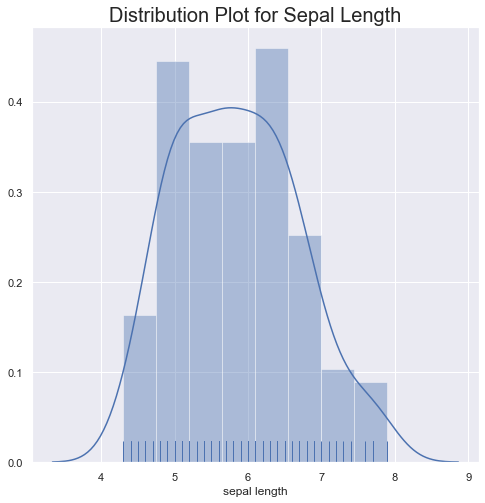

In [388]:
plt.figure(figsize= (8, 8))
sns.distplot(df["sepal length"], kde = True, rug = True)
plt.title("Distribution Plot for Sepal Length", fontsize = 20)
plt.show()


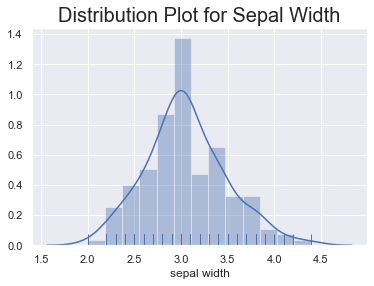

In [384]:
sns.distplot(df["sepal width"], kde = True, rug = True)
plt.title("Distribution Plot for Sepal Width", fontsize = 20)
plt.show()

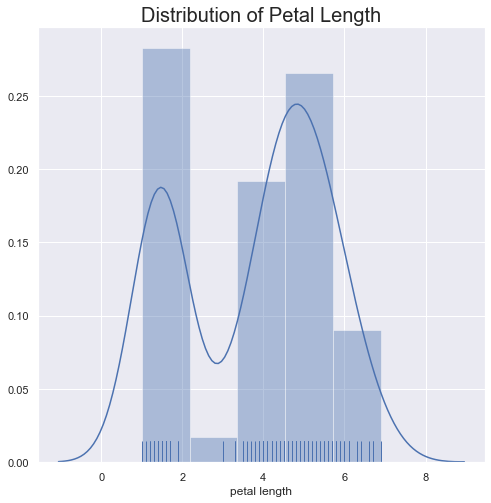

In [387]:
plt.figure(figsize= (8, 8))
sns.distplot(df["petal length"], kde = True, rug = True)
plt.title("Distribution of Petal Length", fontsize = 20)
plt.show()

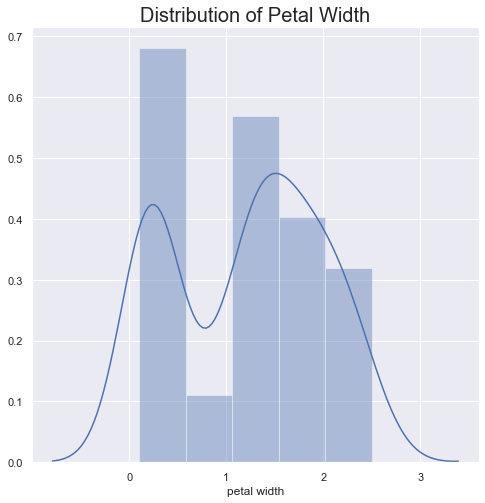

In [389]:
plt.figure(figsize= (8, 8))
sns.distplot(df["petal width"], kde =True, rug = False)
plt.title("Distribution of Petal Width", fontsize = 20)
plt.show()

Notice from the graphs bewlow that the data is not really skewed. However, we still standardize the data in order to reduce the impact of scale.

#### Correlation Matrix

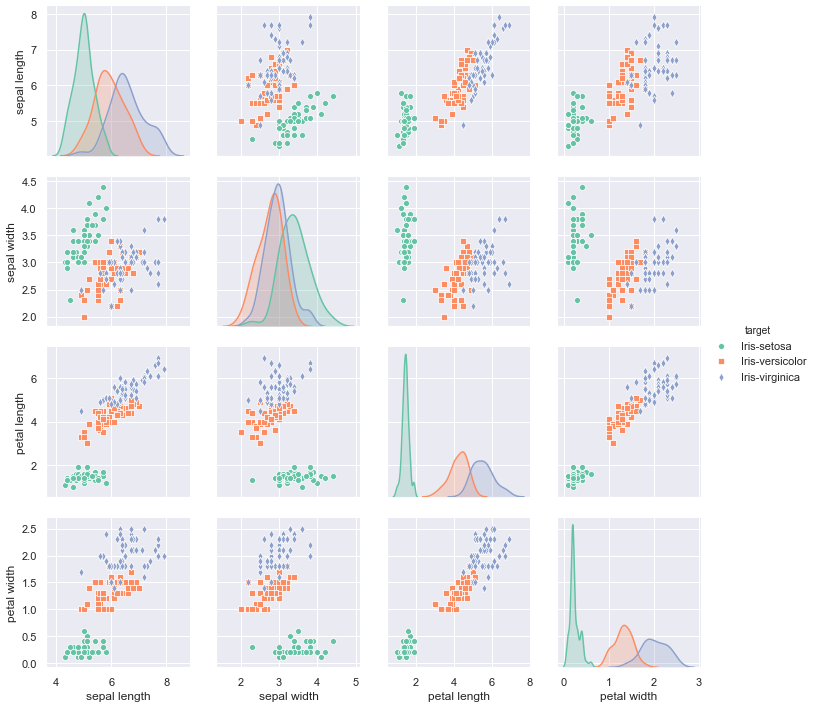

In [394]:
sns.pairplot(df, kind = "scatter", hue = "target", markers = ["o", "s", "d"], palette = "Set2")
#plt.title("Scattergram of Iris Data Set", fontsize = 20)
plt.show()

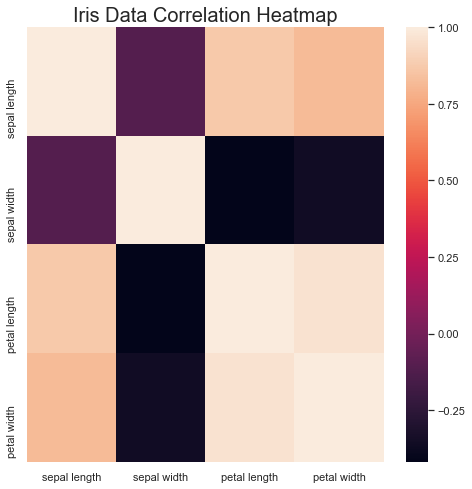

In [395]:
cor_mat = df.corr()
plt.figure(figsize = (8, 8))
sns.heatmap(cor_mat, xticklabels=cor_mat.columns, yticklabels=cor_mat.columns)
plt.title("Iris Data Correlation Heatmap", fontsize = 20)
plt.show()

#### Use svd() Function to Perform PCA

In [396]:
# Center the values of the matrix X
X_centered = X -X.mean(axis = 0)

# Center and scale the values of X   
X_standardized = X -(X.mean(axis = 0)/X.std(axis=0))

#U, S, Vt = np.linalg.svd(X_standardized)

# Perform SVD on centered matrix
U, S, Vt = np.linalg.svd(X_centered)
print("--------------------------------------------")
print("--------------------------------------------")
print("The shape of predictor matrix is:", X.shape)
print("--------------------------------------------")
print("--------------------------------------------")
print("The shape of the left eigen vector matrix U is", U.shape)
print("--------------------------------------------")
print("--------------------------------------------")
print("The shape of the right eigen vector matrix V is:", Vt.T.shape)
print("--------------------------------------------")
print("--------------------------------------------")
print("The shape of the 'semi-diagonal' matrix S is", S.shape)
print("--------------------------------------------")
print("--------------------------------------------")

--------------------------------------------
--------------------------------------------
The shape of predictor matrix is: (150, 4)
--------------------------------------------
--------------------------------------------
The shape of the left eigen vector matrix U is (150, 150)
--------------------------------------------
--------------------------------------------
The shape of the right eigen vector matrix V is: (4, 4)
--------------------------------------------
--------------------------------------------
The shape of the 'semi-diagonal' matrix S is (4,)
--------------------------------------------
--------------------------------------------


In [397]:
PC1 = Vt.T[:, 0]
PC2 = Vt.T[:, 1]
PC3 = Vt.T[:, 2]
PC4 = Vt.T[:, 3]
print("--------------------------------------------")
print("--------------------------------------------")
print ("First PC:", PC1)
print("--------------------------------------------")
print("--------------------------------------------")
print ("Second PC:", PC2)
print("--------------------------------------------")
print("--------------------------------------------")
print ("Third PC:", PC3)
print("--------------------------------------------")
print("--------------------------------------------")
print ("Fourth PC:", PC4)
print("--------------------------------------------")
print("--------------------------------------------")

--------------------------------------------
--------------------------------------------
First PC: [ 0.36158968 -0.08226889  0.85657211  0.35884393]
--------------------------------------------
--------------------------------------------
Second PC: [-0.65653988 -0.72971237  0.1757674   0.07470647]
--------------------------------------------
--------------------------------------------
Third PC: [ 0.58099728 -0.59641809 -0.07252408 -0.54906091]
--------------------------------------------
--------------------------------------------
Fourth PC: [ 0.31725455 -0.32409435 -0.47971899  0.75112056]
--------------------------------------------
--------------------------------------------


Once all principal components have been identified, space dimension can be reduced by projecting the data set into the samller subspace. Recall that this subspace should be selected such that much of the variace in the data set is preserved.

Projecting into the smaller subspace is accomplished via matrix multiplication of the traiing set $X$ by a a projection matrix $W_d$. This the projection is given by 

$$X_{d-proj} = XW_d$$

In [398]:
# Select first two PCs
W2 = Vt.T[:, :2]

# Project to a 2D space via matrix multiplication
X2D = X_centered.dot(W2)

print("------------------------------------------------------------------------------------")
print("Dimensions of first two PC matrix", W2.shape)
print("------------------------------------------------------------------------------------")
print("Matrix of first two PCs", W2)
print("------------------------------------------------------------------------------------")
print("Dimension of projected space", X2D.shape)
print("------------------------------------------------------------------------------------")


--------------------------------------------
--------------------------------------------
Dimensions of first two PC matrix (4, 2)
--------------------------------------------
--------------------------------------------
Matrix of first two PCs [[ 0.36158968 -0.65653988]
 [-0.08226889 -0.72971237]
 [ 0.85657211  0.1757674 ]
 [ 0.35884393  0.07470647]]
--------------------------------------------
--------------------------------------------
Dimension of projected space (150, 2)
--------------------------------------------
--------------------------------------------


#### Dot Product of PCs (Should be Zero)

The dot product of each pair of PCs should be zero as shown below. That is the PC are orthogonal. Recall that the PCs here represent axis.

In [423]:
print("------------------------------------------------------------------------------------")
print("The product of PC1 and PC2 is:", PC1.dot(PC2.T))
print("------------------------------------------------------------------------------------")
print("The product of PC1 and PC3 is:", PC1.dot(PC3.T))
print("------------------------------------------------------------------------------------")
print("The product of PC1 and PC4 is:", PC1.dot(PC4.T))
print("------------------------------------------------------------------------------------")
print("The product of PC2 and PC3 is:", PC2.dot(PC3.T))
print("------------------------------------------------------------------------------------")
print("The product of PC2 and PC4 is:", PC2.dot(PC4.T))
print("------------------------------------------------------------------------------------")
print("The product of PC3 and PC4 is:", PC1.dot(PC4.T))
print("------------------------------------------------------------------------------------")

------------------------------------------------------------------------------------
The product of PC1 and PC2 is: -5.551115123125783e-17
------------------------------------------------------------------------------------
The product of PC1 and PC3 is: -1.6653345369377348e-16
------------------------------------------------------------------------------------
The product of PC1 and PC4 is: 0.0
------------------------------------------------------------------------------------
The product of PC2 and PC3 is: -6.938893903907228e-17
------------------------------------------------------------------------------------
The product of PC2 and PC4 is: -1.1796119636642288e-16
------------------------------------------------------------------------------------
The product of PC3 and PC4 is: 0.0
------------------------------------------------------------------------------------


#### Variance Explained by PCs

The variance explained by a number of PCs is the sum of the corresponding eigne values to the sum of all eigen values. That is if $v_{j}$ denotes the varince explained by $j$ principall comoponents. Then $v_j$ is given by 

$$ v_{j} = \frac{\sigma_{j}}{\sum_{k=1}^{p}\sigma_{k}}$$

In the above expression, $\sigma_{j}, j=1,2,\cdots, p$ are eigen values. Therefore the variace explained by $K$ principal components is givev by 

$$ \sum_{j=1}^{K}v_{j}$$

* The first PC explaines 68.9% of the variation in the data set
* The first two PCs explain 85.4% of the variation in the data set
* The first three PCs explais 94.8% of the variation in the data set

In [424]:
v1 = S[0]/(S[0] + S[1] + S[2] + S[3])
v2 = (S[0]+ S[1])/(S[0] + S[1] + S[2] + S[3])
v3 = (S[0] + S[1] + S[2])/(S[0] + S[1] + S[2] + S[3])
v4 = (S[0] + S[1] + S[2] + S[3])/(S[0] + S[1] + S[2] + S[3])

v = [v1, v2, v3, v4]

print("Vector of Explained Variance:", v)

Vector of Explained Variance: [0.6893434455825802, 0.8544090583609629, 0.9483881906752905, 1.0]


### PC with scikit-learn

PCA is implemented in scikit-learn using SVD. It automatically takes care of centering

#### Standardize Data Set

In [425]:
# Standardize Data
X_stdz = StandardScaler().fit_transform(X)

# Vizualize Standardized Data
pd.DataFrame(data = X_stdz, columns = features).head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


#### Examine the Standardized Data Set

In [426]:
pd.DataFrame(data = X_stdz, columns = features).describe()

,sepal length,sepal width,petal length,petal width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-2.775558e-16,-5.140333e-16,1.154632e-16,9.251859e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


#### Perform Principal Component Analysis with Selected Number of PCs

In [427]:
# Initialize Principal Components
pca = PCA(n_components=3)

# Fit principal components on standardized data
# PrincipalComponents = pca.fit_transform(X_stdz)

PrincipalComponents = pca.fit_transform(X)

# Create a dataframe of principal component
PCA_3 = pd.DataFrame(data = PrincipalComponents , columns = ['PCA1', 'PCA2', 'PCA3'])

# Add the target variable back to the PCs for plottinn
PCA_Data = pd.concat([PCA_3, df["target"]], axis = 1)

# Examine the head of the PCs
PCA_Data.head()

,PCA1,PCA2,PCA3,target
0,-2.684207,0.326607,-0.021512,Iris-setosa
1,-2.715391,-0.169557,-0.203521,Iris-setosa
2,-2.889820,-0.137346,0.024709,Iris-setosa
3,-2.746437,-0.311124,0.037672,Iris-setosa
4,-2.728593,0.333925,0.096230,Iris-setosa


#### Explained Variance Ratio

The variance explaiined by the each of the three PCs above is below. This tells one that 92.5 percent of the variance in the data lies along the first axis, 5% on the second axis.

In [428]:
pca.explained_variance_ratio_

array([0.92461621, 0.05301557, 0.01718514])

#### Plot of First Two PCs

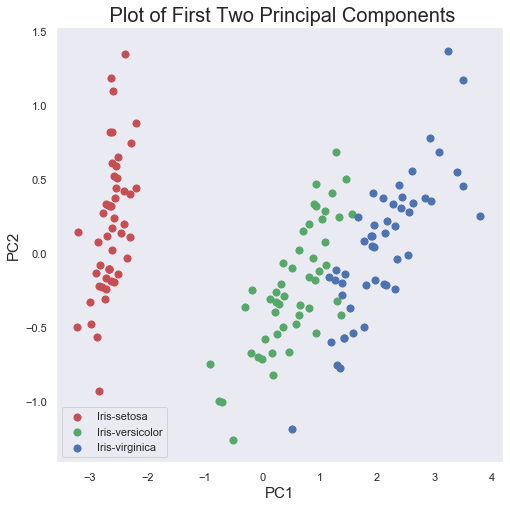

In [429]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title(' Plot of First Two Principal Components', fontsize = 20)

# Target Labels
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# Add colors: green, red, blue
colors = ['r', 'g', 'b']

#Scatter Plot of PCs
for target, color in zip(targets,colors):
    indicesToKeep = PCA_Data['target'] == target
    ax.scatter(PCA_Data.loc[indicesToKeep, 'PCA1']
               , PCA_Data.loc[indicesToKeep, 'PCA2']
               , c = color
               , s = 50)
    
# Add legend
ax.legend(targets)
ax.grid()

#### Choosing the Correct Number of PCs

Choosing the number of dimension to reduce the data set to is important as this needs to be specified in most PC algorithms.  The number of dimensions is usually choosen in such a manner that it adds up to a significant proportion of the variation (e.g., 95%).

In [430]:
# Compute PCA without reducing dimension
pca_new = PCA()
pca_new.fit(X)
cumsum = np.cumsum(pca_new.explained_variance_ratio_)
d = np.argmax(cumsum >=0.90)+1

# Use the max dimension above to reduce dimensions
pca_final = PCA(n_components=d)
X_d_new = pca.fit_transform(X)


A much better option is to produce the so called *scree plot*. This is a plot of the explained variance vs dimensions. An elbow is typically observed where the variance stops growing fast. The scree plot is used to select the desired dimension to reduce the data set to.

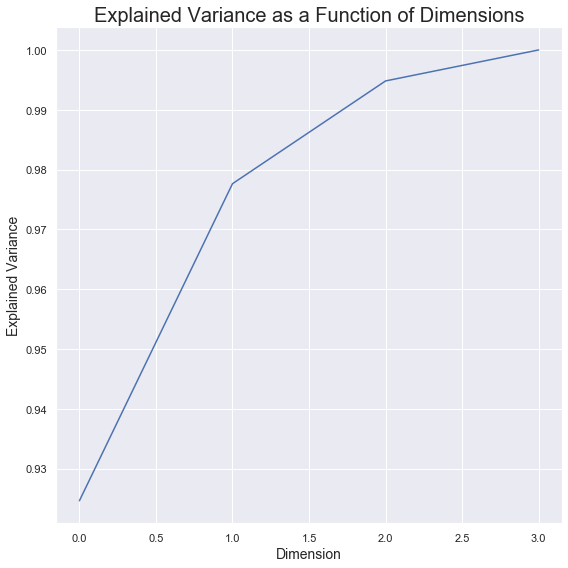

In [431]:
plt.figure(figsize = (8, 8))
plt.plot(cumsum)
plt.xlabel("Dimension", fontsize = 14)
plt.ylabel("Explained Variance", fontsize = 14)
plt.title("Explained Variance as a Function of Dimensions", fontsize = 20)
plt.tight_layout()
plt.show()

The previous figure shows that one PC is able to explaned more that 97% of the varince in the data set (not a very good example). The transformed data set can be decompresed back to the original data set by using the "inverse_transform" in scikit_learn. The error between the recovered and original data is known as the *reconstruction error*. Recall that the PCA dimension redcution equation is a simple matrix multiplication given by:

$$X_{projection} = XW_d$$

From the above equation the recovered matrix is given by:

$$X = X_{projection}W_{d}^{T}$$

In [432]:
pca_decomp = PCA(n_components = 3)
X_new_dim = pca_decomp.fit_transform(X)
X_recovered = pca_decomp.inverse_transform(X_new_dim)

In [433]:
print("------------------------------------------------------------------------------------")
print("Shape of origianal data and recovered data:", X.shape)
print("------------------------------------------------------------------------------------")
print("Shape of recovered data is:", X_recovered.shape)
print("------------------------------------------------------------------------------------")
print("Reconstruction Error:", np.linalg.norm((X-X_recovered), ord =2, keepdims = False))
print("------------------------------------------------------------------------------------")

------------------------------------------------------------------------------------
Shape of origianal data and recovered data: (150, 4)
------------------------------------------------------------------------------------
Shape of recovered data is: (150, 4)
------------------------------------------------------------------------------------
Reconstruction Error: 1.8785023401034908
------------------------------------------------------------------------------------


### Example 2 : PCA on Treasury Rate

One of the main application of PCA in finance is modeling of the *yield curve* dynamics. The following definition of a yield curve is taken from: https://www.investopedia.com/terms/y/yieldcurve.asp. 

*A yield curve is a line that plots the interest rates, at a set point in time, of bonds having equal credit quality but differing maturity dates. The most frequently reported yield curve compares the three-month, two-year, five-year, 10-year and 30-year U.S. Treasury debt. This yield curve is used as a benchmark for other debt in the market, such as mortgage rates or bank lending rates, and it is used to predict changes in economic output and growth.*

In interest rate analysis, the magnitude of interest rate (level), the direction of future rates (slope), and the twist in the shape of the yield curve (curvature) represents the firt three PC of the yield curve. Therefore, the problem of modeling the yield curve can be reduced to that of modeling the first three principal components.

#### Application Data-Treasury Yield Curve Rates

Yield curve data are downloaded from here: https://www.quandl.com/data/USTREASURY/YIELD-Treasury-Yield-Curve-Rates

In [452]:
# Initial Data Rewiew
print("---------------------------------------------------------------------------------------------")
print("Dimensions of Data Set:", pd.read_csv('USTREASURY-YIELD.csv').shape)
print("---------------------------------------------------------------------------------------------")
print("Column Names:", pd.read_csv('USTREASURY-YIELD.csv').columns)
print("---------------------------------------------------------------------------------------------")

---------------------------------------------------------------------------------------------
Dimensions of Data Set: (7435, 13)
---------------------------------------------------------------------------------------------
Column Names: Index(['Date', '1 MO', '2 MO', '3 MO', '6 MO', '1 YR', '2 YR', '3 YR', '5 YR',
       '7 YR', '10 YR', '20 YR', '30 YR'],
      dtype='object')
---------------------------------------------------------------------------------------------


In [475]:
# New Column Names
col_names ={"Date":"Date", "1 MO":"1MO", "2 MO":"2MO", "3 MO":"3MO", "6 MO":"6MO", 
            "1 YR":"1YR", "2 YR":"2YR", "3 YR":"3YR", "5 YR":"5YR", "7 YR":"7YR", "10 YR":"10YR", 
            "20 YR":"20YR", "30 YR":"30YR"}

# Read in data set and rename columns
dt_one = pd.read_csv('USTREASURY-YIELD.csv')
dt_one.rename(columns = col_names, inplace = True)
dt_one["Date"] = pd.to_datetime(dt_one["Date"], format='%Y%m%d', errors='ignore')

dd = dt_one
#dd.set_index(['Date'])
dt_two = dd.sort_values(by = 'Date')

print("---------------------------------------------------------------------------------------------")
# Minimum date
print("Minimum Date is:", dt_two['Date'].min())
print("---------------------------------------------------------------------------------------------")
# Maximum Date
print("Maximum Date is:", dt_two["Date"].max())
print("---------------------------------------------------------------------------------------------")

---------------------------------------------------------------------------------------------
Minimum Date is: 1990-01-02
---------------------------------------------------------------------------------------------
Maximum Date is: 2019-09-18
---------------------------------------------------------------------------------------------


#### EDA (Treasury Yield Curve)

In [476]:
dt_two.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7435 entries, 7434 to 0
Data columns (total 13 columns):
Date    7435 non-null object
1MO     4536 non-null float64
2MO     231 non-null float64
3MO     7432 non-null float64
6MO     7435 non-null float64
1YR     7435 non-null float64
2YR     7435 non-null float64
3YR     7435 non-null float64
5YR     7435 non-null float64
7YR     7435 non-null float64
10YR    7435 non-null float64
20YR    6496 non-null float64
30YR    6441 non-null float64
dtypes: float64(12), object(1)
memory usage: 813.2+ KB


There are a too many missing in the "1MO" and "2MO" treasury rates. We drop them from the data set. All tenors are populated from October 1, 1993.

In [477]:
dt_three = dt_two.drop(["1MO", "2MO"], axis = 1)
dt_four = dt_three.dropna()
print("Minimum date in the data set:", dt_four.Date.min())

Minimum date in the data set: 1993-10-01


#### Summary Statistics

In [478]:
dt_four.describe()

,3MO,6MO,1YR,2YR,3YR,5YR,7YR,10YR,20YR,30YR
count,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000
mean,2.560789,2.690484,2.802955,3.041197,3.223195,3.569176,3.863459,4.088851,4.573190,4.617670
std,2.281913,2.321668,2.326011,2.316087,2.236772,2.055919,1.924922,1.768794,1.708875,1.530739
min,0.000000,0.020000,0.080000,0.160000,0.280000,0.560000,0.910000,1.370000,1.690000,1.940000
25%,0.130000,0.190000,0.350000,0.740000,1.050000,1.680000,2.120000,2.460000,2.880000,3.100000
50%,2.120000,2.180000,2.340000,2.550000,2.680000,2.900000,3.280000,3.770000,4.490000,4.550000
75%,5.040000,5.150000,5.210000,5.430000,5.460000,5.530000,5.650000,5.690000,6.070000,5.900000
max,6.420000,6.670000,7.320000,7.740000,7.840000,7.900000,7.920000,8.050000,8.300000,8.160000


#### Plot Series

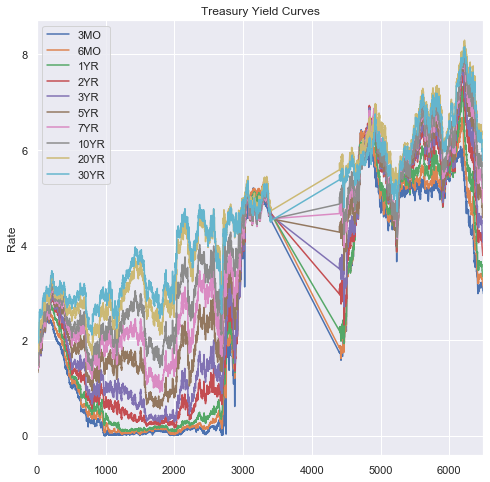

In [479]:
dt_four.plot(figsize = (8, 8))
plt.title("Treasury Yield Curves")
plt.ylabel("Rate")
plt.show()

#### Correlation Analysis

The treasury rates are highly correlated as seen in the following figure.

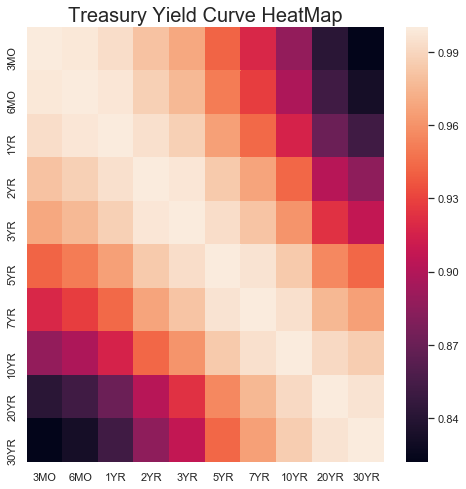

In [440]:
cor_mat_tr = dt_four.drop(["Date"], axis = 1).corr()
plt.figure(figsize = (8, 8))
sns.heatmap(cor_mat_tr, xticklabels = cor_mat_tr.columns, yticklabels = cor_mat_tr.columns)
plt.title("Treasury Yield Curve HeatMap", fontsize = 20)
plt.show()

#### Perform PCA

Most of the variation in the data set is explianed by three PCs.

Variance Explained [9.57771050e-01 3.81278647e-02 3.21678419e-03 4.68139600e-04
 1.78017201e-04 1.45166582e-04 3.46917539e-05 2.54151558e-05
 2.29315510e-05 9.93895477e-06]


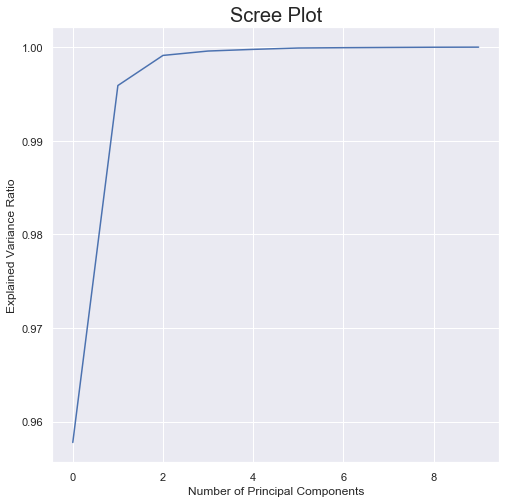

In [480]:
pca_tr = PCA()
pca_tr.fit(dt_four.drop(["Date"], axis = 1))
cumsum_tr = np.cumsum(pca_tr.explained_variance_ratio_)

print("Variance Explained", pca_tr.explained_variance_ratio_)

plt.figure(figsize = (8, 8))
plt.plot(cumsum_tr)
plt.title("Scree Plot", fontsize = 20)
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.show()

In [442]:
pca_tr_final= PCA(n_components = 3)
pca_tr_final.fit(dt_four.drop(["Date"], axis = 1))

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

#### Slope, Level and Curvature
To appreciate the terms, level, slope and curvature, it can be useful to look at changes in sign of the principal component weights in the graph below. PC1 has the same sign for each term, so all rates will move up or down together due to the first principal component (level). PC2 has one change in sign, so the shorter maturity rates will move in opposite direction to the longer rates due to the second principal component (slope). PC3 has two changes in sign, so the shortest and longest maturities move in the same direction, whilst the middle maturities move in the opposite direction (curvature). 

The above of slope, level and curvature can be found here: https://www.clarusft.com/principal-component-analysis-of-the-swap-curve-an-introduction/. The following figure is elaborates from the concept of slope, level and curvature.

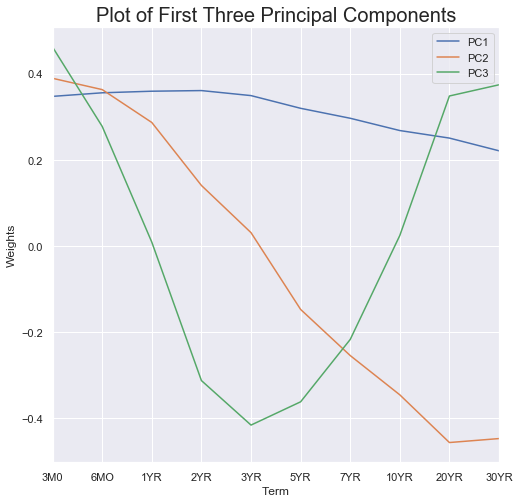

In [443]:
pca_data = pd.DataFrame(pca_tr_final.components_.T, 
                        columns = ["PC1", "PC2", "PC3"],
                       index = ["3M0", "6MO", "1YR", "2YR", "3YR", "5YR", "7YR", "10YR", "20YR", "30YR"])
pca_data.head()

pca_data.plot(figsize = (8, 8))
plt.title("Plot of First Three Principal Components", fontsize = 20)
plt.xlabel("Term")
plt.ylabel("Weights")
plt.show()

In [444]:
pca_data.head(10)

,PC1,PC2,PC3
3M0,0.347058,0.388965,0.461211
6MO,0.355338,0.362753,0.277222
1YR,0.359023,0.286404,0.008495
2YR,0.360496,0.140284,-0.312615
3YR,0.348842,0.030712,-0.415934
5YR,0.319346,-0.147502,-0.361910
7YR,0.296236,-0.254555,-0.217181
10YR,0.267728,-0.345752,0.024208
20YR,0.250214,-0.456442,0.347941
30YR,0.220721,-0.447243,0.373945


#### Dimension Reduction

The 10 dimensional data set is reduced to a 3 dimesnional data set with the use of Principal Component Analysis.

Dimensions of Reduced data set (5499, 3)
Dimensions of original data set: (5499, 10)


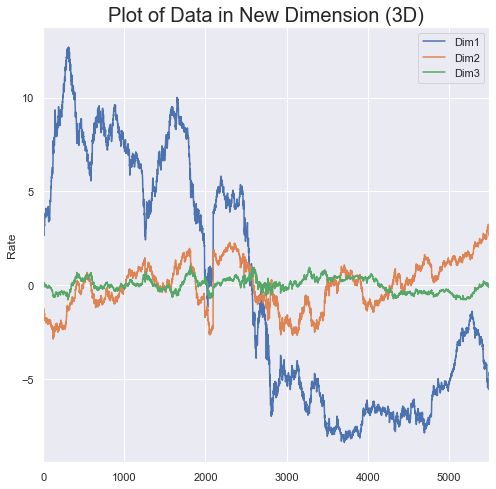

In [445]:
# Reduce Dimensions
values = pca_tr_final.transform(dt_four.drop(["Date"], axis = 1))
transformed_data = pd.DataFrame(values, columns = ["Dim1", "Dim2", "Dim3"])

print("Dimensions of Reduced data set", transformed_data.shape)
print("Dimensions of original data set:", dt_four.drop(["Date"], axis = 1).shape)

# Plot data in three dimensions
transformed_data.plot(figsize = (8, 8))
plt.title("Plot of Data in New Dimension (3D)", fontsize = 20)
plt.ylabel("Rate")
plt.show()

#### Summary of PCA Calculation

The following piece of code performs dimension reduction on the treasury data set using singular value decomposition.

----------------------------------------------------------------------------------------------
Vector of Explained Variance: [0.7548238153034972, 0.9054276336191664, 0.9658602884907669]
----------------------------------------------------------------------------------------------


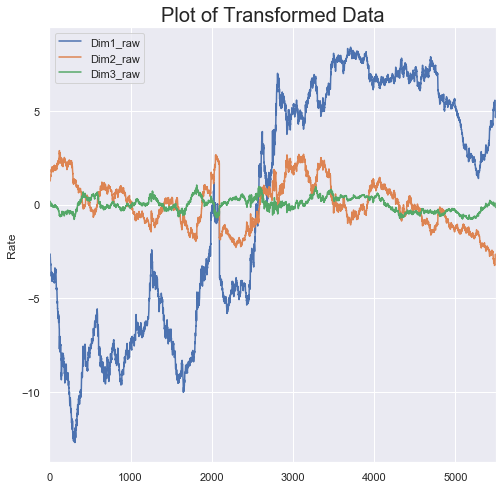

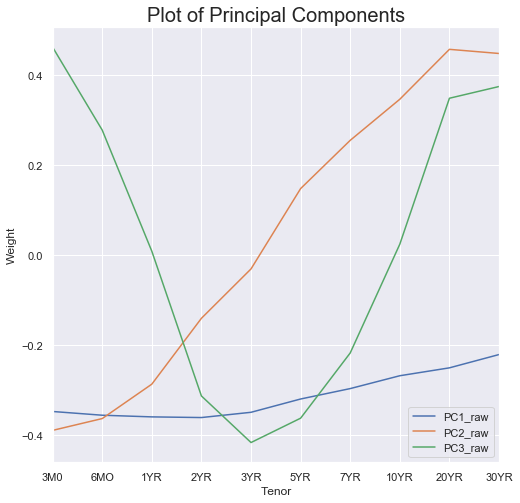

In [450]:
# Create the Predictor Matrix
X_tr = dt_four.drop(["Date"], axis =1).values

# Center Matrix
X_tr_centered = X_tr - X_tr.mean(axis=0)

# Singular Value Decomposition
U_tr, S_tr, Vt_tr = np.linalg.svd(X_tr_centered)

# First three Principal Component
PC1_tr = Vt_tr.T[:, 0]
PC2_tr = Vt_tr.T[:, 1]
PC3_tr = Vt_tr.T[:, 2]

# Select first three PCs: used to reduce dimentions
W3_tr = Vt_tr.T[:, :3]

# Project to a 2D space via matrix multiplication
X3D_tr = X_tr_centered.dot(W3_tr)

# Examine variance explained
tot = S_tr[0] + S_tr[1] + S_tr[2] + S_tr[3] +S_tr[4] + S_tr[5] + S_tr[6] + S_tr[7] + S_tr[8] + S_tr[9]  

# Calculate percentage of variance explained
v1 = S_tr[0]/ tot
v2 = (S_tr[0]+ S_tr[1])/ tot
v3 = (S_tr[0] + S_tr[1] + S_tr[2] + S_tr[3])/tot

# Collect variances explained by first three PCs and print
v = [v1, v2, v3]

print("----------------------------------------------------------------------------------------------")
print("Vector of Explained Variance:", v)
print("----------------------------------------------------------------------------------------------")

# Create Data Set of Reduced Dimension
transformed_raw_dt = pd.DataFrame(X3D_tr, columns = ["Dim1_raw", "Dim2_raw", "Dim3_raw"])

# Create Data Set for First Three PCS
pca_raw_dt = pd.DataFrame(W3_tr, columns = ["PC1_raw", "PC2_raw", "PC3_raw"],  
                          index = ["3M0", "6MO", "1YR", "2YR", "3YR", "5YR", "7YR", "10YR", "20YR", "30YR"])

# Plot Transformed Data
transformed_raw_dt.plot(figsize = (8, 8))
plt.title("Plot of Transformed Data", fontsize = 20)
plt.ylabel("Rate")
plt.show()

# Plot PCS
pca_raw_dt.plot(figsize = (8, 8))
plt.title("Plot of Principal Components", fontsize = 20)
plt.xlabel("Tenor")
plt.ylabel("Weight")
plt.show()
